<a href="https://colab.research.google.com/github/shraddha-an/cnns/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN for Classification of Fashion MNIST


In [1]:
# Importing libraries
import matplotlib.pyplot as plt, seaborn as sb
from keras.datasets import fashion_mnist

# Importing the dataset from Keras API
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Shape of the dataset
print("Shape of training set: ", X_train.shape, y_train.shape)
print("Shape of test set: ", X_test.shape, y_test.shape)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4423680/4422102 [==============================] - 0s 0us/step
Shape of training set:  (60000, 28, 28) (60000,)
Shape of test set:  (10000, 28, 28) (10000,)


One Hot Encoding the 10 Fashion labels

In [ ]:
# OHE the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Scaling the pixels to the range 0-1
X_train, X_test = X_train.astype(float), X_test.astype(float)
X_train, X_test = X_train/ 255, X_test / 255

print(X_train[0,:], X_test[0,:])

Reshaping the array to the 4D format that Keras expects: (samples, height, width, channels)

In [5]:
X_train, X_test = X_train.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)

print('\nTraining shape: ', X_train.shape, '\nTest shape: ', X_test.shape)


Training shape:  (60000, 28, 28, 1) 
Test shape:  (10000, 28, 28, 1)


Building the CNN

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
	
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# compile model
opt = SGD(lr = 0.001, momentum = 0.9)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 64, epochs = 10,
                    validation_data = (X_test, y_test), verbose = 1)


Epoch 1/10
938/938 [==============================] - 385s 411ms/step - loss: 0.5935 - accuracy: 0.7925 - val_loss: 0.3265 - val_accuracy: 0.8843
Epoch 2/10
938/938 [==============================] - 391s 416ms/step - loss: 0.3433 - accuracy: 0.8790 - val_loss: 0.2835 - val_accuracy: 0.8994
Epoch 3/10
938/938 [==============================] - 398s 424ms/step - loss: 0.2901 - accuracy: 0.8982 - val_loss: 0.2329 - val_accuracy: 0.9164
Epoch 4/10
938/938 [==============================] - 398s 424ms/step - loss: 0.2629 - accuracy: 0.9074 - val_loss: 0.2528 - val_accuracy: 0.9091
Epoch 5/10
938/938 [==============================] - 392s 418ms/step - loss: 0.2440 - accuracy: 0.9136 - val_loss: 0.2208 - val_accuracy: 0.9227
Epoch 6/10
938/938 [==============================] - 396s 422ms/step - loss: 0.2265 - accuracy: 0.9183 - val_loss: 0.2191 - val_accuracy: 0.9199
Epoch 7/10
938/938 [==============================] - 393s 419ms/step - loss: 0.2177 - accuracy: 0.9227 - val_loss: 0.2204 -

Saving the model

In [9]:
model.save('fashion_mnist.h5')

# Saving to local machine
from google.colab import files
files.download("fashion_mnist.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions & Metrics

In [10]:
# Evaluating model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print('\nLoss: ', loss, "\nAccuracy: ", accuracy)

313/313 [==============================] - 15s 47ms/step - loss: 0.1997 - accuracy: 0.9289

Loss:  0.1997087597846985 
Accuracy:  0.9289000034332275


Plotting the diagnostics

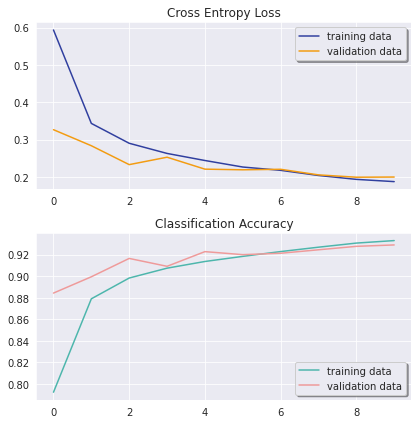

In [12]:
# Plotting the diagnostic curve
sb.set_style('darkgrid')
plt.figure(figsize = (6, 6))

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label = 'training data', color = '#303F9F')
plt.plot(history.history['val_loss'], label = 'validation data', color = '#F39C12')
plt.legend(shadow = True, loc = 'upper right')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label = 'training data', color = '#4DB6AC')
plt.plot(history.history['val_accuracy'], label = 'validation data', color = '#EF9A9A')

plt.tight_layout()
plt.legend(shadow = True, loc = 'lower right')
plt.savefig('training_diagnostics.png')

plt.show()
